In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

ModuleNotFoundError: No module named 'seaborn'

In [65]:
data = pd.read_csv('interpreting-data-using-statistical-models-python/02/demos/datasets/house_data_processed.csv')
data['price_per_sqft'] = data['price']/data['sqft_living']

In [66]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated,price_per_sqft
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1986.552492,12768.455652,43.317818,0.042289,264.156594
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,685.391304,27304.179631,29.375493,0.201253,110.060793
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000,-1.000000,0.000000,87.588235
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,18.000000,0.000000,182.291667
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,40.000000,0.000000,244.644550
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000,63.000000,0.000000,318.322981
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,115.000000,1.000000,810.138889


In [67]:
data.shape

(21613, 17)

In [68]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated,price_per_sqft
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0,188.050847
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1,209.338521
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0,233.766234
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0,308.163265
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0,303.571429


In [69]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated,price_per_sqft
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.585379,0.082447,-0.053951,0.126092,0.554703
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.391638,0.029244,-0.154324,0.018553,-0.206069
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.568634,0.087175,-0.506407,0.050260,-0.091421
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.756420,0.183286,-0.318488,0.055094,-0.092314
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.144608,0.718557,-0.052990,0.007745,-0.033822
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.279885,-0.011269,-0.489640,0.006260,0.003840
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.086463,0.030703,0.026093,0.093294,0.193215
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.280439,0.072575,0.053458,0.104062,0.220932
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.092824,-0.003406,0.360665,-0.060139,0.102345
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.713202,0.119248,-0.447415,0.014008,0.122758


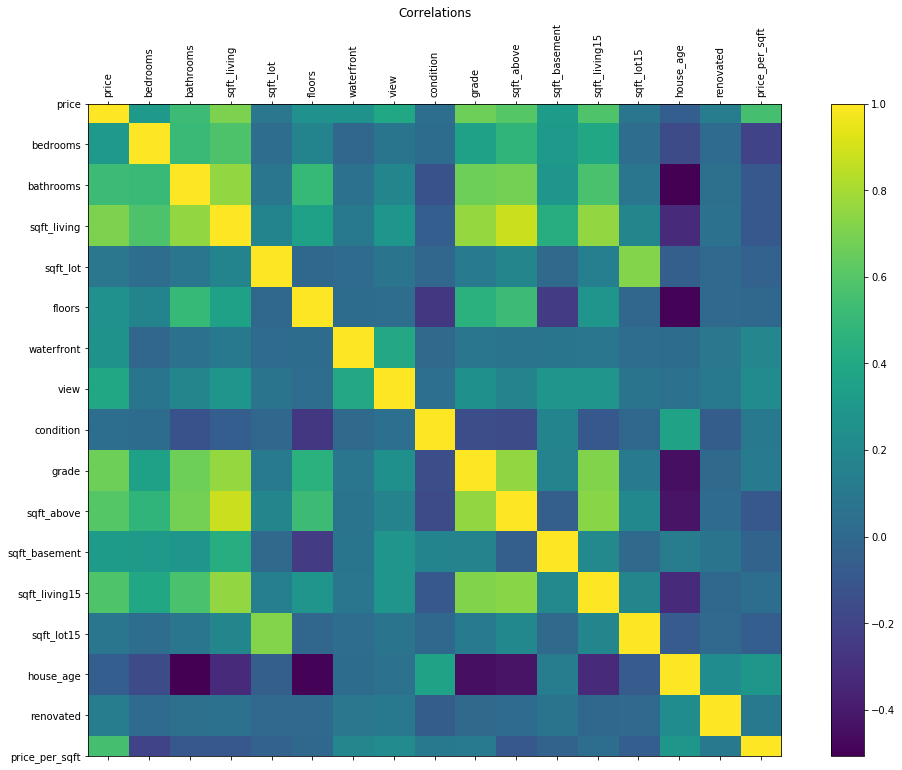

In [70]:
plt.figure(figsize=(18, 12))

plt.matshow(data.corr(), fignum=False)

columns = len(data.columns)

plt.xticks(range(columns), data.columns)
plt.yticks(range(columns), data.columns)

plt.colorbar()
plt.xticks(rotation=90)
plt.title('Correlations', y=1)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D65C9C0048>]],
      dtype=object)

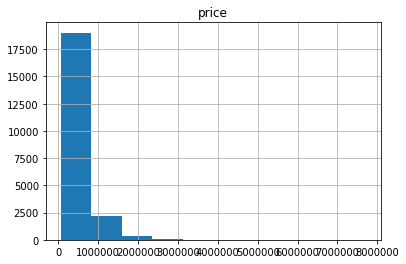

In [28]:
data.hist(['price'])

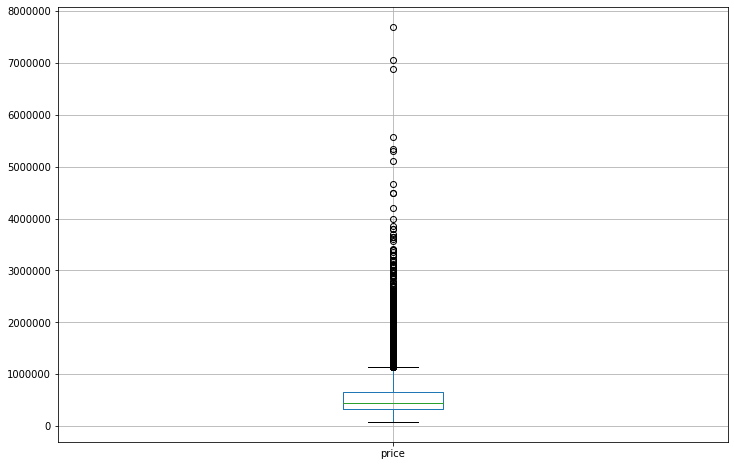

In [29]:
data.boxplot('price', figsize=(12, 8))

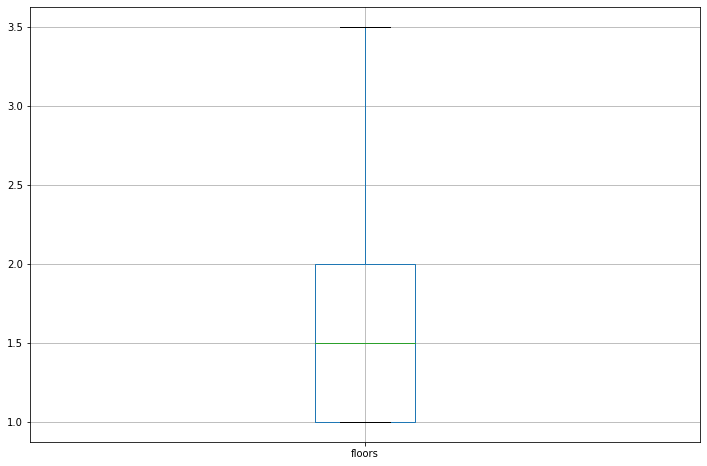

In [30]:
data.boxplot('floors', figsize=(12, 8))

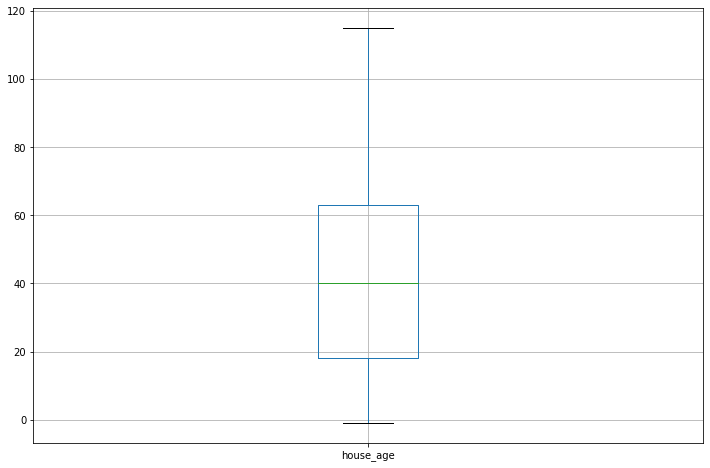

In [34]:
data.boxplot('house_age', figsize=(12, 8))

In [38]:
pearsonr(data['price'], data['sqft_living'])

(0.7020350546118, 0.0)

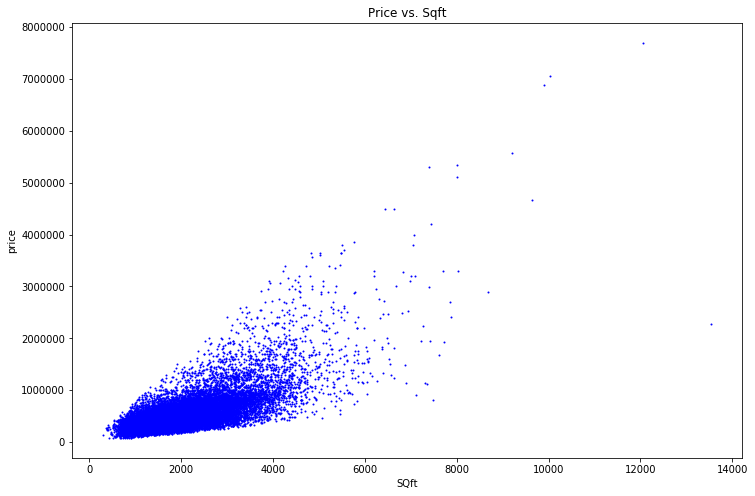

In [41]:
plt.figure(figsize=(12, 8))
plt.scatter(data['sqft_living'], data['price'], , color='b')

plt.title('Price vs. Sqft')
plt.xlabel('SQft')
plt.ylabel('price')

plt.show()

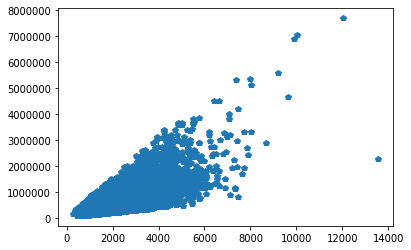

In [51]:
x = np.array(data['sqft_living'])
y = np.array(data['price'])
plt.plot(x, y, 'p')

In [52]:
m, b = np.polyfit(x, y, 1)
print("m = ", m, "b = ", b)

m =  280.6235678974484 b =  -43580.743094474194


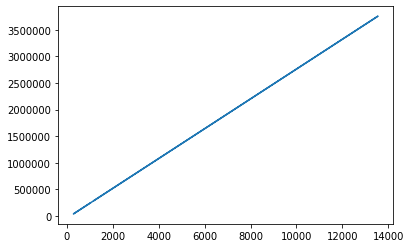

In [53]:
plt.plot(x, m*x + b)

In [64]:
data.sample()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated,price_per_sqft
19562,1356920,4,3.5,4270,5800,2.0,0,3,5,10,3170,1100,3100,5800,77,0,317.779859


In [57]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated,price_per_sqft
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0,188.050847
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1,209.338521
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0,233.766234
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0,308.163265
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,5,0,235.294118
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,1,0,173.160173
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,5,0,394.216667
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,11,0,250.000000


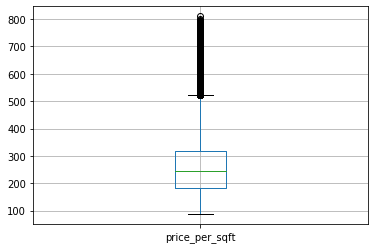

In [59]:
data.boxplot('price_per_sqft')